## Prostý tah

Načtení potřebných knihoven a spuštění sázeného textu:

In [2]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

### Př2:

U prutové soustavy podle obrázku stanovte bezpečnost vzhledem k meznímu stavu pružnosti.

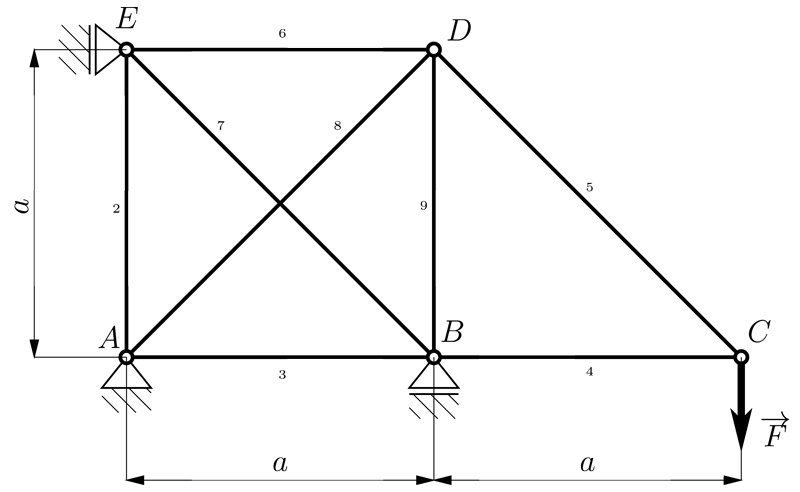

In [4]:
Image(filename='tah2_a.png')

Úloha je $2\times$ staticky neurčitá.

*Úkol*: Zkontrolujte statickou určitost/neurčitost.

Ze statické neurčitosti plyne následující čístečné uvolnění, viz. obrázek,

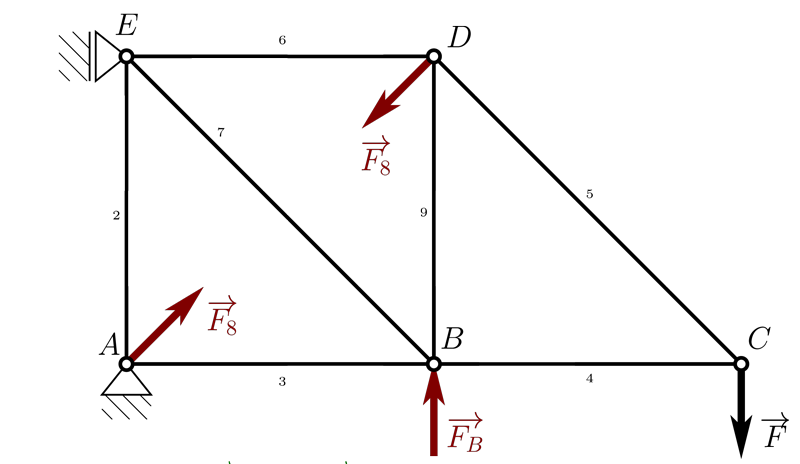

In [11]:
Image(filename='tah2_b.png')

s deformačními podmínkami,

$$
  u_A=0\quad\mathrm{a}\quad u_B=0.
$$

U prutových soustav neuvolňujeme pruty, ale *styčníky*. Jejich uvolnění je na následujícím obrázku,

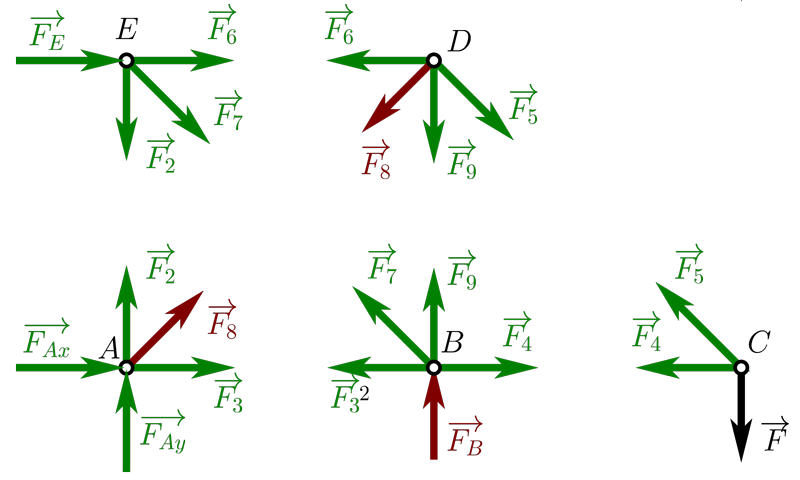

In [6]:
Image(filename='tah2_c.png')

K výpočtu musíme podle značení v obrázku zavést následující symboly,

In [39]:
FAx,FAy,FB,FE,F=sp.symbols('F_Ax F_Ay F_B F_E F')
F2,F3,F4,F5,F6,F7,F8,F9=sp.symbols('F2 F3 F4 F5 F6 F7 F8 F9')
E=sp.symbols('E')
S=sp.symbols('S')
a=sp.symbols('a')
delta,sk=sp.symbols('delta sigma_k')

Z rovnic rovnováhy jednotlivých styčníků se dostane následující soustava rovnic,

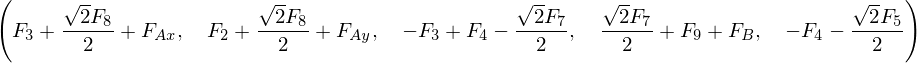

In [13]:
eqn1=FAx+F3+F8*sp.sqrt(2)/2
eqn2=FAy+F2+F8*sp.sqrt(2)/2
eqn3=-F3-F7*sp.sqrt(2)/2+F4
eqn4=FB+F7*sp.sqrt(2)/2+F9
eqn5=-F4-F5*sp.sqrt(2)/2
eqn6=-F+F5*sp.sqrt(2)/2
eqn7=-F6-F8*sp.sqrt(2)/2+F5*sp.sqrt(2)/2
eqn8=-F8*sp.sqrt(2)/2-F9-F5*sp.sqrt(2)/2
eqn9=FE+F6+F7*sp.sqrt(2)/2
eqn10=-F2-F7*sp.sqrt(2)/2
eqn1,eqn2,eqn3,eqn4,eqn5

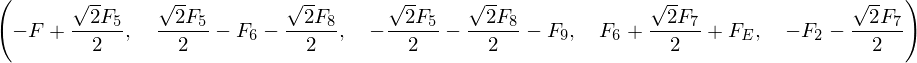

In [14]:
eqn6,eqn7,eqn8,eqn9,eqn10

Řešení soustavy rovnic - úloha je 2x staticky neurčitá, jako parametry jsou zvoleny síly $F_B$ a $F_8$, viz. obrázek částečného uvolnění,

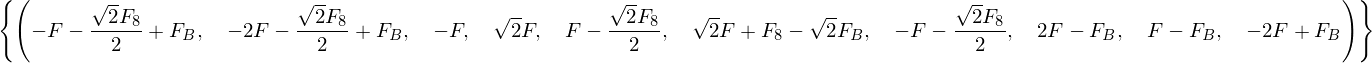

In [16]:
sol=sp.linsolve([eqn1,eqn2,eqn3,eqn4,eqn5,eqn6,eqn7,eqn8,eqn9,eqn10], \
             [F2,F3,F4,F5,F6,F7,F9,FAx,FAy,FE],)
sol

Výsledky se přiřadí jednotlivým vnitřním účinkům a reakcím ve vazbách,

In [20]:
N2,N3,N4,N5,N6,N7,N9,FAx_,FAy_,FE_=next(iter(sol))
N8=F8

Závislost jednotlivých vnitřních účinků na parametrech $F_8$ a $F_B$,

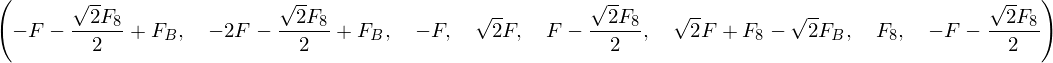

In [21]:
N=N2,N3,N4,N5,N6,N7,N8,N9
N

Délky jednotlivých prutů,

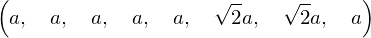

In [22]:
l=a,a,a,a,a,sp.sqrt(2)*a,sp.sqrt(2)*a,a
l

Potenciální energie soustavy prutů,

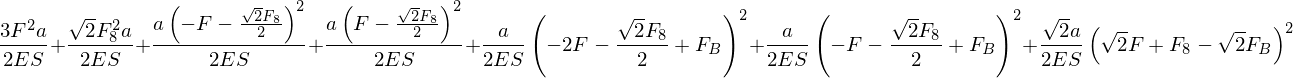

In [24]:
w=[]
for ii in enumerate(N):
  w.append(ii[1]**2*l[ii[0]]/2/E/S)
W=sum(w)
W

Derivace

\begin{equation}
  \frac{\partial W}{\partial F_8}\quad \mathrm{a} \quad \frac{\partial W}{\partial F_B}
\end{equation}

a sestavení deformačních podmínek

\begin{equation}
  u_8=\frac{\partial W}{\partial F_8}=0 \quad \mathrm{a} \quad u_B=\frac{\partial W}{\partial F_B}=0.
\end{equation}

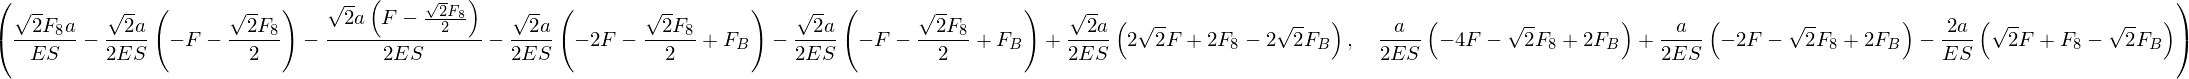

In [25]:
eqn1=W.diff(F8)
eqn2=W.diff(FB)
eqn1,eqn2

Řešení soustavy rovnic a nalezení neznámých $F_8$ a $F_B$:

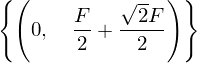

In [34]:
sol1=sp.linsolve([sp.expand(eqn1),sp.expand(eqn2)],[F8,FB])
sol1

Síla $F_8$ a tedy i vnitřní účinek $N_8$ jsou nulové. Z toho plyne, že prut číslo $8$ je zbytečný a může být odstraněn.

Zpětné dosazení $F_8$ a $F_B$ do vnitřních účinků:

In [35]:
F8_,FB_=next(iter(sol1))

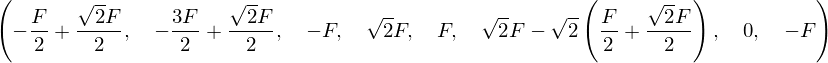

In [36]:
N2_=N2.subs({F8:F8_,FB:FB_})
N3_=N3.subs({F8:F8_,FB:FB_})
N4_=N4.subs({F8:F8_,FB:FB_})
N5_=N5.subs({F8:F8_,FB:FB_})
N6_=N6.subs({F8:F8_,FB:FB_})
N7_=N7.subs({F8:F8_,FB:FB_})
N8_=N8.subs({F8:F8_,FB:FB_})
N9_=N9.subs({F8:F8_,FB:FB_})
N_=N2_,N3_,N4_,N5_,N6_,N7_,N8_,N9_
N_

Dosazením za $F=1$ zjistíme, který prut je nejvíce namáhaný,

In [37]:
N2_1=N2_.subs(F,1.)
N3_1=N3_.subs(F,1.)
N4_1=N4_.subs(F,1.)
N5_1=N5_.subs(F,1.)
N6_1=N6_.subs(F,1.)
N7_1=N7_.subs(F,1.)
N8_1=N8_.subs(F,1.)
N9_1=N9_.subs(F,1.)
N_1=abs(N2_1),abs(N3_1),abs(N4_1),abs(N5_1),abs(N6_1),abs(N7_1),abs(N8_1),abs(N9_1)
n_max=N_1.index(max(N_1))

In [38]:
print 'nejvetsi napětí je v prutu {}'.format(n_max+2)
N_[n_max]

nejvetsi napětí je v prutu 5


Bezpečnost k meznímu stavu pružnosti se následně spočítá podle vztahu,

$$
  k=\frac{\sigma_k}{\sigma_{max}},
$$

kde 

$$
  \sigma_{max}=\frac{N_{max}}{S},
$$

tedy,

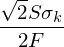

In [41]:
k=sk/(N_[n_max]/S)
k